Caliberating validation set with test accuracy
Season_1 , Season_2 lag and Seasonal 3 component are the features

In [177]:
%store -r __toolboxforsalesdata

In [178]:
__toolboxforsalesdata

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [179]:
import pickle

In [180]:
monitoring_data = pd.read_csv('monitoring_data.csv')

In [181]:
#xgboost model for this calliberation, linear model yet to be obtained.
#Note I am unable to get parameters I set. Must try a diff format.
xgboost_caliberation = pickle.load(open("xgb_model1_set_1_lag_2_seasonal.pickle.dat","rb"))

In [183]:
for_lr = train_calib.dropna()
X = for_lr.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)
y = for_lr['item_cnt_month']
lm_calliberation = LinearRegression()
lm_calliberation.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
lm_calliberation_prediction = lm_calliberation.predict(final_val_for_calib.drop('item_cnt_month', axis = 1))

In [185]:
#Best alpha for ensemble being 0.092,- alpha*lin + (1-alpha)*xgb
final_val_for_calib = valid_calib.dropna()
final_val_for_calib.drop(['shop_id','item_id','item_category_id','unique'], axis = 1, inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [258]:
xgboost_caliberation_prediction = xgboost_caliberation.predict(xgboost.DMatrix(final_val_for_calib.drop('item_cnt_month', axis = 1)), ntree_limit=211)

In [279]:
temp = xgboost_caliberation.predict(xg_val, ntree_limit=211)

In [186]:
pred_call1 = 0.092*lm_calliberation_prediction+(1-0.092)*xgboost_caliberation_prediction
rmse_1 = rmse(final_val_for_calib['item_cnt_month'], pred_call1)
trim_rmse1 = compute_trimmed_rmse(pred_call1.copy(), final_val_for_calib['item_cnt_month'].copy())

In [229]:
monitoring_data``

,index,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.1521,2.16371,1.17125,Lag1
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.1524,2.16037,1.16766,Lag1
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.7824,2.15148,1.14767,Lag1
3,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935,2.04778,1.09124,Lag1_Lag2_Seasonal
4,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936,2.050922,1.09067,Lag1_Lag2_Seasonal


In [287]:
dropped_val_lag1_lag2_season.dropna().shape

(7127, 9)

In [285]:
final_val_for_calib.shape

(7127, 10)

In [283]:
len(pd.isnull(dropped_val_lag1_lag2_season))/len(val_lag1_2_season)

1.0

In [280]:
rmse(val_lag1_2_season['item_cnt_month'], temp)

12.621818998865741

In [281]:
rmse(final_val_for_calib['item_cnt_month'],xgboost_caliberation_prediction)

24.93264163402205

In [188]:
trim_rmse1

2.047781109189153

In [191]:
monitoring_data

,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score
0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.152129,2.163706,1.17125
1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.152377,2.160372,1.16766
2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.782377,2.151485,1.14767


In [202]:
monitoring_data['Features'] = 'Lag1'

In [203]:
to_be_added = ['xg_model_6_01_subsample_1', 'lm_model', 'None', 'None', 'alpha(0.092*lm+0.908*xg)', 'ensemble_lin_xgb_0092', 'ensemble_lin_xgb_0092_lag1_lag2_season','Time_based','subset_of_train_full_lag1_lag2_seasonal', '24.935','2.04778','1.09124','Lag1_Lag2_Seasonal']

In [204]:
monitoring_data = pd.concat([monitoring_data , pd.DataFrame(np.expand_dims(to_be_added,axis = 0) , columns = monitoring_data.columns)], axis = 0)

In [205]:
pred_call2 = (0.092*lm_calliberation_prediction+(1-0.092)*xgboost_caliberation_prediction)-0.025
pred_call2[pred_call2<0] = 0
rmse_2 = rmse(final_val_for_calib['item_cnt_month'], pred_call2)
trim_rmse2 = compute_trimmed_rmse(pred_call2.copy(), final_val_for_calib['item_cnt_month'].copy())

12.621004

In [255]:
rmse(final_val_for_calib['item_cnt_month'], xgboost_caliberation_prediction)

24.940924281984767

In [207]:
trim_rmse2

2.0509226553203104

In [208]:
to_be_added = ['xg_model_6_01_subsample_1', 'lm_model', 'None', 'None', 'alpha(0.092*lm+0.908*xg)', 'ensemble_lin_xgb_0092_less_0025', 'ensemble_lin_xgb_0092_lag1_lag2_season_less_0025','Time_based','subset_of_train_full_lag1_lag2_seasonal', '24.936','2.050922','1.09067','Lag1_Lag2_Seasonal']

In [209]:
monitoring_data = pd.concat([monitoring_data , pd.DataFrame(np.expand_dims(to_be_added,axis = 0) , columns = monitoring_data.columns)], axis = 0)

In [211]:
monitoring_data.to_csv('monitoring_data.csv')

In [215]:
train_full = pd.read_csv('train_full_lag1_lag2_season.csv')

In [216]:
initial_sales_data1 = pd.read_csv('sales_train.csv')

In [217]:
initial_sales_data1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [218]:
initial_test = pd.read_csv('test.csv')

In [219]:
initial_sales_data2 = pd.read_csv('item_categories.csv')

In [220]:
initial_sales_data3 = pd.read_csv('items.csv')

In [221]:
initial_sales_data2.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [222]:
monitoring_data.reset_index(inplace = True)

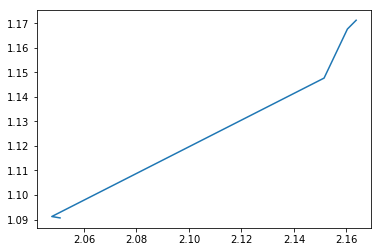

In [225]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(monitoring_data['Validation_Score_after_clip'], monitoring_data['Public_LB_Score'])
plt.show()

In [267]:
#May be I should tune the xgboost with current data.
train_full_lag1_2_season = pd.read_csv('train_full_lag1_lag2_season.csv')

In [268]:
train_full_lag1_2_season.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [224]:
monitoring_data

,index,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.1521,2.16371,1.17125,Lag1
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.1524,2.16037,1.16766,Lag1
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.7824,2.15148,1.14767,Lag1
3,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935,2.04778,1.09124,Lag1_Lag2_Seasonal
4,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936,2.050922,1.09067,Lag1_Lag2_Seasonal


In [269]:
train_full_lag1_2_season.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature'],
      dtype='object')

In [270]:
train_lag1_2_season, val_lag1_2_season = month_split(train_full_lag1_2_season, 33)

In [271]:
dropped_train_lag1_lag2_season = train_lag1_2_season.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)

In [272]:
dropped_val_lag1_lag2_season = val_lag1_2_season.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)

In [273]:
len(dropped_train_lag1_lag2_season)

1577591

In [274]:
len(train_full_lag1_2_season['item_cnt_month'])

1609122

In [275]:
#Training with xgboost with default parameters
xg_train = xgboost.DMatrix(dropped_train_lag1_lag2_season,label = train_lag1_2_season.copy()['item_cnt_month'])
xg_val = xgboost.DMatrix(dropped_val_lag1_lag2_season,label = val_lag1_2_season.copy()['item_cnt_month'])

In [277]:
param_set_2_lag_2_seasonal = {'max_depth': 1, 'eta': 0.05, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}

In [305]:
progress_1_05_lag1_lag2_seasonal = {}
xg_model_1_05_lag1_lag2_seasonal = xgboost.train(param_set_2_lag_2_seasonal , xg_train,early_stopping_rounds=10,evals = [(xg_train , "train_set"),(xg_val,"validation_set")], evals_result=progress_1_05_lag1_lag2_seasonal ,num_boost_round=1000)

[0]	train_set-rmse:8.52987	validation_set-rmse:14.5663
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 10 rounds.
[1]	train_set-rmse:8.39853	validation_set-rmse:14.5006
[2]	train_set-rmse:8.292	validation_set-rmse:14.3993
[3]	train_set-rmse:8.18005	validation_set-rmse:14.3387
[4]	train_set-rmse:8.0731	validation_set-rmse:14.2877
[5]	train_set-rmse:7.98396	validation_set-rmse:14.2028
[6]	train_set-rmse:7.89381	validation_set-rmse:14.1605
[7]	train_set-rmse:7.80272	validation_set-rmse:14.1134
[8]	train_set-rmse:7.72049	validation_set-rmse:14.0306
[9]	train_set-rmse:7.64872	validation_set-rmse:13.9944
[10]	train_set-rmse:7.57247	validation_set-rmse:13.9471
[11]	train_set-rmse:7.50488	validation_set-rmse:13.8918
[12]	train_set-rmse:7.44033	validation_set-rmse:13.8788
[13]	train_set-rmse:7.37715	validation_set-rmse:13.8174
[14]	train_set-rmse:7.31828	validation_set-rmse:13.7865
[15]	train

[144]	train_set-rmse:5.9572	validation_set-rmse:12.9735
[145]	train_set-rmse:5.95609	validation_set-rmse:12.9735
[146]	train_set-rmse:5.95408	validation_set-rmse:12.9735
[147]	train_set-rmse:5.9529	validation_set-rmse:12.9735
[148]	train_set-rmse:5.95109	validation_set-rmse:12.9735
[149]	train_set-rmse:5.94963	validation_set-rmse:12.9704
[150]	train_set-rmse:5.94891	validation_set-rmse:12.9704
[151]	train_set-rmse:5.94753	validation_set-rmse:12.9704
[152]	train_set-rmse:5.94616	validation_set-rmse:12.9691
[153]	train_set-rmse:5.94497	validation_set-rmse:12.9684
[154]	train_set-rmse:5.94367	validation_set-rmse:12.9684
[155]	train_set-rmse:5.94244	validation_set-rmse:12.9684
[156]	train_set-rmse:5.9417	validation_set-rmse:12.9684
[157]	train_set-rmse:5.94062	validation_set-rmse:12.9684
[158]	train_set-rmse:5.93911	validation_set-rmse:12.9684
[159]	train_set-rmse:5.93895	validation_set-rmse:12.9684
[160]	train_set-rmse:5.93763	validation_set-rmse:12.9684
[161]	train_set-rmse:5.93714	valid

In [331]:
param_set_3_lag_2_seasonal = {'max_depth': 3, 'eta': 0.05, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}
progress_2_05_lag1_lag2_seasonal = {}
xg_model_2_05_lag1_lag2_seasonal = xgboost.train(param_set_3_lag_2_seasonal , xg_train,early_stopping_rounds=10,evals = [(xg_train , "train_set"),(xg_val,"validation_set")], evals_result=progress_2_05_lag1_lag2_seasonal ,num_boost_round=1000)

[0]	train_set-rmse:8.45927	validation_set-rmse:14.519
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 10 rounds.
[1]	train_set-rmse:8.2533	validation_set-rmse:14.4085
[2]	train_set-rmse:8.07555	validation_set-rmse:14.2536
[3]	train_set-rmse:7.89463	validation_set-rmse:14.1427
[4]	train_set-rmse:7.73412	validation_set-rmse:14.0619
[5]	train_set-rmse:7.57739	validation_set-rmse:13.9763
[6]	train_set-rmse:7.43426	validation_set-rmse:13.901
[7]	train_set-rmse:7.29858	validation_set-rmse:13.8252
[8]	train_set-rmse:7.17465	validation_set-rmse:13.7604
[9]	train_set-rmse:7.06157	validation_set-rmse:13.6747
[10]	train_set-rmse:6.95517	validation_set-rmse:13.5985
[11]	train_set-rmse:6.86179	validation_set-rmse:13.5481
[12]	train_set-rmse:6.76653	validation_set-rmse:13.4877
[13]	train_set-rmse:6.67735	validation_set-rmse:13.4222
[14]	train_set-rmse:6.59555	validation_set-rmse:13.3764
[15]	train

In [343]:
param_set_4_lag_2_seasonal = {'max_depth': 4, 'eta': 0.05, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 0.5,'eval_metric': 'rmse'}
progress_3_05_lag1_lag2_seasonal = {}
xg_model_3_05_lag1_lag2_seasonal = xgboost.train(param_set_4_lag_2_seasonal , xg_train,early_stopping_rounds=30,evals = [(xg_train , "train_set"),(xg_val,"validation_set")], evals_result=progress_3_05_lag1_lag2_seasonal ,num_boost_round=1000)

[0]	train_set-rmse:8.44601	validation_set-rmse:14.5052
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 30 rounds.
[1]	train_set-rmse:8.22514	validation_set-rmse:14.3928
[2]	train_set-rmse:8.03102	validation_set-rmse:14.2065
[3]	train_set-rmse:7.84188	validation_set-rmse:14.0978
[4]	train_set-rmse:7.66995	validation_set-rmse:14.0006
[5]	train_set-rmse:7.50113	validation_set-rmse:13.9184
[6]	train_set-rmse:7.3416	validation_set-rmse:13.8485
[7]	train_set-rmse:7.19937	validation_set-rmse:13.7493
[8]	train_set-rmse:7.06941	validation_set-rmse:13.6492
[9]	train_set-rmse:6.95356	validation_set-rmse:13.4802
[10]	train_set-rmse:6.8364	validation_set-rmse:13.434
[11]	train_set-rmse:6.73604	validation_set-rmse:13.371
[12]	train_set-rmse:6.63657	validation_set-rmse:13.3434
[13]	train_set-rmse:6.53602	validation_set-rmse:13.3052
[14]	train_set-rmse:6.44719	validation_set-rmse:13.2533
[15]	train_

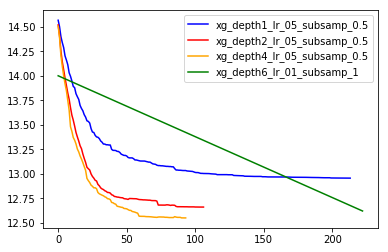

In [344]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(xg_model_1_05_lag1_lag2_seasonal.best_ntree_limit), progress_1_05_lag1_lag2_seasonal['validation_set']['rmse'][0:xg_model_1_05_lag1_lag2_seasonal.best_ntree_limit], color = 'blue', label = 'xg_depth1_lr_05_subsamp_0.5')
ax1.plot(np.arange(xg_model_2_05_lag1_lag2_seasonal.best_ntree_limit), progress_2_05_lag1_lag2_seasonal['validation_set']['rmse'][0:xg_model_2_05_lag1_lag2_seasonal.best_ntree_limit], color = 'red', label = 'xg_depth2_lr_05_subsamp_0.5')
ax1.plot(np.arange(xg_model_3_05_lag1_lag2_seasonal.best_ntree_limit), progress_3_05_lag1_lag2_seasonal['validation_set']['rmse'][0:xg_model_3_05_lag1_lag2_seasonal.best_ntree_limit], color = 'orange', label = 'xg_depth4_lr_05_subsamp_0.5')
ax1.plot([0,len(progress_1_05_lag1_lag2_seasonal['validation_set']['rmse'])-1], [14,xgboost_caliberation.best_score], color ='green', label = 'xg_depth6_lr_01_subsamp_1')
ax1.legend()
plt.show()

In [296]:
monitoring_data['row_type_val'] = 'na_dropped'
monitoring_data['row_type_test'] = 'na_predicted_as_zero'

In [351]:
xg_model_3_05_lag1_lag2_seasonal.best_score

12.550432

In [362]:
xg_model_3_05_lag1_lag2_seasonal.best_ntree_limit

94

In [363]:
compute_trimmed_rmse(val_lag1_2_season.copy()['item_cnt_month'],xg_model_3_05_lag1_lag2_seasonal.predict(xg_val, ntree_limit=xg_model_3_05_lag1_lag2_seasonal.best_ntree_limit))

2.1850761534363525

In [360]:
rmse(val_lag1_2_season.copy()['item_cnt_month'],xg_model_3_05_lag1_lag2_seasonal.predict(xg_val))

12.565412424645453

In [364]:
why = xg_model_3_05_lag1_lag2_seasonal.predict(xg_val)

In [366]:
len(np.unique(why))test

3966

In [367]:
test_for_submit = pd.read_csv('test_full_lag1_lag2_seasonal.csv')

In [371]:
test_for_submit.drop(['Unnamed: 0','ID','shop_id','item_id','item_category_id','unique'],axis = 1, inplace = True)

In [381]:
features = dropped_val_lag1_lag2_season.columns.values

In [378]:
test_for_submit['is_music'] = test_for_submit['is_music'].astype(float)

In [382]:
xg_test = xgboost.DMatrix(test_for_submit[features])

In [383]:
try_submitting = xg_model_3_05_lag1_lag2_seasonal.predict(xg_test)

In [388]:
len(np.unique(try_submitting))/len(try_submitting)

0.023949579831932775

In [389]:
max(try_submitting)

674.4618

In [390]:
min(try_submitting)

1.2152548

In [392]:
np.mean(try_submitting)

2.8989894

In [395]:
test_for_submit.columns

Index(['indicator', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'item_price', 'lag_only_item_cat', 'lag2_only_item_cat',
       'lag2_only_item', 'lag2_shop_item_comb', 'seasonal_freq_3_feature'],
      dtype='object')

In [396]:
verify = pd.read_csv('test_full_lag1_lag2_seasonal.csv')

In [409]:
count = 0
for i in test_unique_item_id:
    if i not in train_unique_item_id:
        count+=1
print(count)

363


In [414]:
count = 0
for i in test_unique_shop_id:
    if i not in train_unique_shop_id:
        count+=1
print(count)

0


In [400]:
train_unique_item_id = np.unique(np.unique(train_full_lag1_2_season['item_id']))

In [404]:
test_unique_item_id = np.unique(np.unique(verify['item_id']))

In [410]:
train_unique_shop_id = np.unique(np.unique(train_full_lag1_2_season['shop_id']))

In [411]:
test_unique_shop_id = np.unique(np.unique(verify['shop_id']))

In [412]:
len(train_unique_item_id)

21805

In [413]:
len(test_unique_item_id)

5100

In [419]:
sum(pd.isnull(test_for_submit[features]['item_price']))

102796

In [421]:
test_for_submit[test_for_submit["indicator"]==0]

,indicator,is_music,lag_shop_item_comb,lag_only_item,item_price,lag_only_item_cat,lag2_only_item_cat,lag2_only_item,lag2_shop_item_comb,seasonal_freq_3_feature
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
70,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
74,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
75,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
77,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512
109,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047512


In [425]:
submit = pd.DataFrame([verify['ID'], try_submitting]).T

In [426]:
submit['ID'] = submit['ID'].astype(int)
submit.rename(columns={'Unnamed 0': 'item_cnt_month'}, inplace=True)

In [428]:
submit.loc[submit['item_cnt_month'] >= 20, 'item_cnt_month'] = 20
submit.loc[submit['item_cnt_month'] <= 0, 'item_cnt_month'] = 0

In [429]:
submit.to_csv('take_care.csv',index=False)

In [433]:
sum(submit['item_cnt_month'] == 20)

665

In [ ]:
ax1.d

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


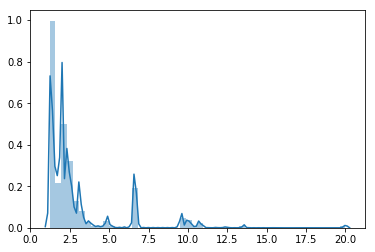

In [436]:
fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
sns.distplot(submit['item_cnt_month'].values, ax = ax2)
plt.show()

In [438]:
dist_comp = pd.read_csv('ensemble_lin_xgb_0092_lag1_lag2_season.csv')

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


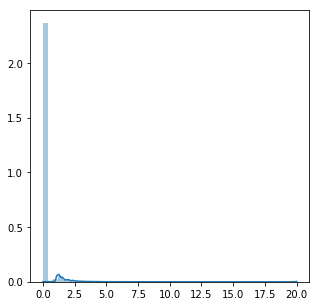

In [441]:
fig2 = plt.figure(figsize=(5,5))
ax3 = fig2.add_subplot(111)
sns.distplot(dist_comp['item_cnt_month'].values, ax = ax3)
plt.show()

In [443]:
xg_model_3_05_lag1_lag2_seasonal.best_score

12.550432

In [449]:
to_be_added = ['xg_model_4_05_subsample_05', 'None', 'None', 'None', 'None', 'xgb_pred', 'xgb_lag1_lag2_season','Time_based','subset_of_train_full_lag1_lag2_seasonal', '12.5504','2.1850','3.59936','Lag1_Lag2_Seasonal','na_kept_as_is','all_predict_with_xg']

In [450]:
monitoring_data = pd.concat([monitoring_data , pd.DataFrame(np.expand_dims(to_be_added,axis = 0) , columns = monitoring_data.columns)], axis = 0)

In [447]:
monitoring_data.drop('index',axis = 1 , inplace=True)

In [452]:
monitoring_data.reset_index(inplace=True)

In [457]:
monitoring_data['Test_Prediction_Name'][5] = 'only_xgb_lag1_lag2_season'

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [458]:
monitoring_data

,index,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features,row_type_val,row_type_test
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.1521,2.16371,1.17125,Lag1,na_dropped,na_predicted_as_zero
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.1524,2.16037,1.16766,Lag1,na_dropped,na_predicted_as_zero
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.7824,2.15148,1.14767,Lag1,na_dropped,na_predicted_as_zero
3,3,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935,2.04778,1.09124,Lag1_Lag2_Seasonal,na_dropped,na_predicted_as_zero
4,4,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936,2.050922,1.09067,Lag1_Lag2_Seasonal,na_dropped,na_predicted_as_zero
5,0,xg_model_4_05_subsample_05,None,None,None,None,xgb_pred,only_xgb_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,12.5504,2.1850,3.59936,Lag1_Lag2_Seasonal,na_kept_as_is,all_predict_with_xg


In [460]:
submit.to_csv('only_xgb_lag1_lag2_season.csv',index=False)